# Simple logistic regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task.csv')

In [3]:
data[:5]

,Experience,Success
0,14,0
1,29,0
2,6,0
3,25,1
4,18,1


In [4]:
success = data.Success

In [5]:
n = len(success)
n

25

## statsmodels.GLM

In [6]:
import statsmodels.api as sm

In [7]:
experience = data.Experience.values

In [8]:
experience1 = sm.add_constant(experience)

In [9]:
model_glm = sm.GLM(success,experience1,family=sm.families.Binomial()).fit()
model_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Success   No. Observations:                   25
Model:                            GLM   Df Residuals:                       23
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.712
Date:                Fri, 04 Oct 2019   Deviance:                       25.425
Time:                        13:13:30   Pearson chi2:                     24.1
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0597      1.259     -2.430      0.015      -5.528      -0.591
x1             0.1615      0.065      2.485      0.013       0.034       0.289
==============================================================================
"""

In [10]:
model_glm.params

const   -3.059696
x1       0.161486
dtype: float64

In [11]:
data1 = data.copy()

In [12]:
data1[:5]

,Experience,Success
0,14,0
1,29,0
2,6,0
3,25,1
4,18,1


In [13]:
model_glm.fittedvalues[:5]

0    0.310262
1    0.835263
2    0.109996
3    0.726602
4    0.461837
dtype: float64

In [14]:
# predict probabilities

In [15]:
data1['fittedvalues'] = model_glm.fittedvalues
data1[-5:]

,Experience,Success,fittedvalues
20,19,0,0.502134
21,4,0,0.082130
22,28,1,0.811825
23,22,1,0.620812
24,8,1,0.145815


In [19]:
# probability of success with 19 months experience is 0.50

In [16]:
model_glm.resid_response[:6]

0   -0.310262
1   -0.835263
2   -0.109996
3    0.273398
4    0.538163
5   -0.082130
dtype: float64

In [17]:
data1['resid_response'] = model_glm.resid_response
data1[:5]

,Experience,Success,fittedvalues,resid_response
0,14,0,0.310262,-0.310262
1,29,0,0.835263,-0.835263
2,6,0,0.109996,-0.109996
3,25,1,0.726602,0.273398
4,18,1,0.461837,0.538163


In [18]:
# resid_response is difference [Success - fittedvalues]

In [19]:
model_glm.predict(experience1)[:5]

array([0.31026237, 0.83526292, 0.10999616, 0.72660237, 0.46183704])

In [20]:
yprob = model_glm.predict(experience1)

In [21]:
# convert probabilities to yhat (predicted category)

In [22]:
yhat = yprob.copy()

In [23]:
yhat[yhat>0.5] = 1
yhat[yhat<0.5] = 0

In [24]:
yhat = yhat.astype(int)

In [25]:
data1['yhat'] = yhat
data1[:5]

,Experience,Success,fittedvalues,resid_response,yhat
0,14,0,0.310262,-0.310262,0
1,29,0,0.835263,-0.835263,1
2,6,0,0.109996,-0.109996,0
3,25,1,0.726602,0.273398,1
4,18,1,0.461837,0.538163,0


In [26]:
# prediction errors

In [27]:
data1[data1.Success != data1.yhat]

,Experience,Success,fittedvalues,resid_response,yhat
1,29,0,0.835263,-0.835263,1
4,18,1,0.461837,0.538163,0
18,24,0,0.693379,-0.693379,1
19,13,1,0.276802,0.723198,0
20,19,0,0.502134,-0.502134,1
24,8,1,0.145815,0.854185,0


In [28]:
# error rate

In [29]:
6/n

0.24

In [30]:
model_glm.null_deviance

34.29649001261865

In [31]:
model_glm.deviance

25.424574080450917

In [32]:
# confidence intervals for model params

In [33]:
model_glm.conf_int(alpha=0.1)

,0,1
const,-5.131142,-0.988250
x1,0.054603,0.268369


In [34]:
# odds ratio

In [35]:
odds_ratio = np.exp(model_glm.params)
odds_ratio

const    0.046902
x1       1.175256
dtype: float64

In [36]:
# odds ratio is 1.17

In [37]:
# Odds of success increase by 17.5% with each additional month of experience

In [38]:
# Confidence interval for odds ratio

In [39]:
np.exp(model_glm.conf_int(0.05))

,0,1
const,0.003974,0.553543
x1,1.034716,1.334884


In [40]:
# AIC

In [41]:
model_glm.aic

29.424574080450917

In [42]:
xaxis = range(np.max(experience))
yaxis = model_glm.predict(sm.add_constant(xaxis))

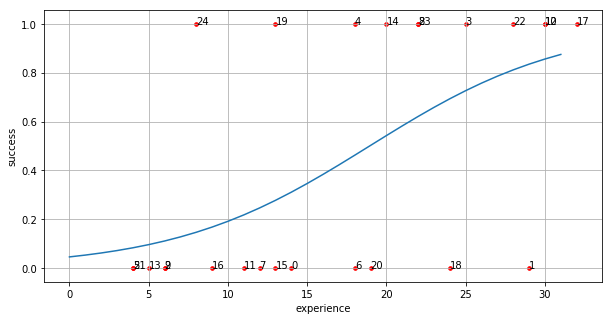

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(experience,success,s=13,c='r')

for i in range(n):
    plt.annotate(i,(experience[i],success[i]))

# fitted curve
plt.plot(xaxis,yaxis)

plt.xlabel('experience')
plt.ylabel('success')
plt.grid()

In [ ]:
# confusion table

In [44]:
pd.crosstab(data1.yhat,data1.Success)

Success,0,1
yhat,,
0,11,3
1,3,8


In [45]:
# error_rate is 6/25

In [46]:
# probability of a success with 22 months of experience

In [47]:
pred=model_glm.predict([1,22])
pred

array([0.62081158])

## Validation approach with sm.GLM

In [48]:
np.random.seed(1)

In [49]:
# training rows

In [50]:
rows = np.random.choice(24,17,replace=False)
rows

array([13, 18,  3, 14, 20, 17, 10,  4,  2, 19,  6,  7, 21,  1, 16,  0, 15])

In [51]:
data_train = data.loc[rows] 
data_test = data.drop(rows)

In [52]:
# test features and target

In [53]:
success_test = data_test.Success
experience_test = data_test.Experience.values

In [54]:
# train features and target

In [55]:
success_train = data_train.Success
experience_train = data_train.Experience.values

In [56]:
# fit train model - then predict the test set

In [57]:
model_val=sm.GLM(success_train,sm.add_constant(experience_train),
                               family=sm.families.Binomial()).fit()

In [58]:
yhat = model_val.predict(sm.add_constant(experience_test))

In [59]:
yhat[yhat>0.5] = 1
yhat[yhat<0.5] = 0

In [60]:
df2 = pd.DataFrame()
df2['Success'] = success_test
df2['prediction'] = yhat.astype(int)
df2

,Success,prediction
5,0,0
8,1,0
9,0,0
11,0,0
12,1,1
22,1,1
23,1,0
24,1,0


In [61]:
m = len(df2)
m

8

In [62]:
pd.crosstab(df2.prediction,df2.Success)

Success,0,1
prediction,,
0,3,3
1,0,2


In [63]:
3/m

0.375

In [64]:
# error_rate is 3/8 = 37.5%

# LogisticRegression from sklearn

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [66]:
# features must be numpy.ndarray -not a pandas Series, not a vector

In [67]:
type(experience)

numpy.ndarray

In [68]:
# convert to numpy array

In [69]:
experience = np.array(experience).reshape(-1,1)

In [70]:
model = LogisticRegression(solver='lbfgs').fit(experience,success)

In [71]:
model.coef_

array([[0.1608086]])

In [72]:
model.intercept_

array([-3.04760123])

In [73]:
# e)  predict success if 22 months of experience

In [74]:
x_test = np.array([22]).reshape(-1,1)

In [75]:
# predict outcome

In [76]:
model.predict(x_test)

array([1], dtype=int64)

In [77]:
# model predicts a success with 22 months experience

In [78]:
# predict probability of success

In [79]:
model.predict_proba(x_test)

array([[0.37984928, 0.62015072]])

In [80]:
# probability of failure, probability of success

In [81]:
model.predict_proba(x_test)[:,1]

array([0.62015072])

In [82]:
# plot 

In [83]:
# xaxis, yaxis different from sm.GLM

In [84]:
xaxis = np.array(range(np.max(experience))).reshape(-1,1)
yaxis = model.predict_proba(xaxis)[:,1]

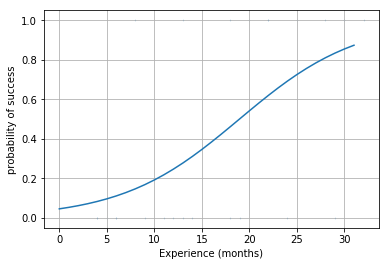

In [85]:
plt.plot(xaxis,yaxis)
plt.xlabel('Experience (months)')
plt.ylabel('probability of success')
plt.scatter(experience,success,s=0.1)
plt.grid()

In [ ]:
# g) error rate

In [86]:
del df2

In [87]:
yhat = model.predict(experience)

In [88]:
df2 = pd.DataFrame()
df2['Success'] = success
df2['prediction'] = yhat.astype(int)
df2[:5]

,Success,prediction
0,0,0
1,0,1
2,0,0
3,1,1
4,1,0


In [89]:
pd.crosstab(df2.prediction,df2.Success)

Success,0,1
prediction,,
0,11,3
1,3,8


In [90]:
# error rate

In [91]:
6/n

0.24

### h) Validation approach with sklearn

In [92]:
# split data into train (30%) and test (70%) sets

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(experience,success,
                                                    stratify=success,test_size=0.3,
                                                    shuffle = True,random_state=1)

In [94]:
model = LogisticRegression(solver="lbfgs").fit(X_train,Y_train)

In [95]:
yhat = model.predict(X_test)

In [96]:
df3 = pd.DataFrame()
df3['Success'] = Y_test
df3['prediction'] = yhat.astype(int)
df3

,Success,prediction
14,1,1
13,0,0
18,0,1
24,1,0
7,0,0
8,1,1
12,1,1
15,0,0


In [97]:
m = len(df3)

In [98]:
pd.crosstab(df3.prediction,df3.Success)

Success,0,1
prediction,,
0,3,1
1,1,3


In [99]:
2/m

0.25